# Cells Fire Together Wire Together

* Perceptron algorithm in sklearn

In [33]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) #Iris setosa

per_clf =Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2, 0.5], [3, 0]]
print(per_clf.predict(X_new)) 


[ True False]


In [34]:
import tensorflow as tf
from tensorflow.keras import layers

class EQL(layers.Layer):
    def __init__(self, units, activation_functions, **kwargs):
        super(EQL, self).__init__(**kwargs)
        self.units = units
        self.activation_functions = activation_functions
        self.dense = layers.Dense(units)

    def call(self, inputs):
        x = self.dense(inputs)
        outputs = []
        for i, func in enumerate(self.activation_functions):
            if isinstance(func, tuple):  # For functions with multiple inputs
                start, end = func[1]
                outputs.append(func[0](x[:, start:end]))
            else:
                outputs.append(func(x[:, i:i+1]))
        return tf.concat(outputs, axis=1)

# Example usage:
activation_functions = [
    tf.math.sin,
    lambda x: x**2,
    lambda x: x[:, 0:1] * x[:, 1:2],  # Multiplication of two inputs
    tf.math.exp,
]

eql_layer = EQL(units=4, activation_functions=activation_functions)
# ... rest of your model architecture ...

Epoch 1/100
32/32 - 0s - 15ms/step - loss: 24.9672
Epoch 2/100
32/32 - 0s - 1ms/step - loss: 22.2005
Epoch 3/100
32/32 - 0s - 1ms/step - loss: 19.8621
Epoch 4/100
32/32 - 0s - 1ms/step - loss: 17.8560
Epoch 5/100
32/32 - 0s - 1ms/step - loss: 16.1195
Epoch 6/100
32/32 - 0s - 1ms/step - loss: 14.6046
Epoch 7/100
32/32 - 0s - 1ms/step - loss: 13.2735
Epoch 8/100
32/32 - 0s - 1ms/step - loss: 12.0964
Epoch 9/100
32/32 - 0s - 1ms/step - loss: 11.0494
Epoch 10/100
32/32 - 0s - 1ms/step - loss: 10.1137
Epoch 11/100
32/32 - 0s - 951us/step - loss: 9.2745
Epoch 12/100
32/32 - 0s - 981us/step - loss: 8.5198
Epoch 13/100
32/32 - 0s - 972us/step - loss: 7.8404
Epoch 14/100
32/32 - 0s - 1ms/step - loss: 7.2284
Epoch 15/100
32/32 - 0s - 1ms/step - loss: 6.6777
Epoch 16/100
32/32 - 0s - 1ms/step - loss: 6.1829
Epoch 17/100
32/32 - 0s - 1ms/step - loss: 5.7390
Epoch 18/100
32/32 - 0s - 1ms/step - loss: 5.3418
Epoch 19/100
32/32 - 0s - 1ms/step - loss: 4.9872
Epoch 20/100
32/32 - 0s - 1ms/step - loss:

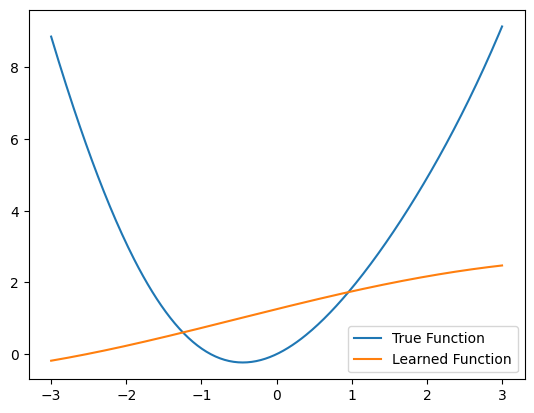

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers


# Define the target function
def target_function(x):
    return x**2 + tf.math.sin(x)

# Generate training data
x_train = tf.random.uniform((1000, 1), minval=-2, maxval=2)
y_train = target_function(x_train)

# Define the model
inputs = layers.Input(shape=(1,))
x = EQL(units=2, activation_functions=[tf.math.sin, lambda x: x**2])(inputs)
outputs = layers.Dense(1)(x)
model = models.Model(inputs=inputs, outputs=outputs)

# Define the loss function with L0.5 regularization
def sparse_loss(y_true, y_pred):
    mse = losses.MeanSquaredError()(y_true, y_pred)
    l05 = tf.reduce_sum(tf.abs(model.layers[1].dense.kernel)**0.5)  # L0.5 on EQL weights
    return mse + 0.01 * l05  # Adjust regularization strength as needed

# Compile the model
model.compile(optimizer=optimizers.Adam(), loss=sparse_loss)

# Train the model
model.fit(x_train, y_train, epochs=100, verbose=2)

# Print the learned EQL weights
print("EQL Dense Layer Kernel:")
print(model.layers[1].dense.kernel.numpy())

# Evaluate the model
x_test = tf.linspace(-3, 3, 300)
y_test = target_function(x_test)
y_pred = model.predict(x_test)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test, y_test, label="True Function")
plt.plot(x_test, y_pred, label="Learned Function")
plt.legend()
plt.show()

# Building a Image Classifier Using the Sequential API

In [36]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [38]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [39]:
X_train.dtype

dtype('uint8')

In [40]:
X_train.shape

(55000, 28, 28)

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

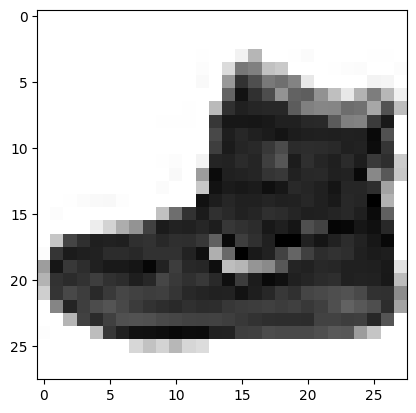

In [42]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [43]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [44]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel Boot"]

In [45]:
class_names[y_train[0]]

'Ankel Boot'

In [46]:
tf.random.set_seed(42) #random seed to produce the reproducible outputs

In [47]:
model = tf.keras.Sequential() #simplest form of neural network where each layer is connected to each other
model.add(tf.keras.layers.Input(shape = [28, 28])) # building the first layer(Input layer) and adding it to model
model.add(tf.keras.layers.Flatten()) # simple preprocessing step to convert each image into 1D
model.add(tf.keras.layers.Dense(300, activation="relu")) # input layer
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) #output layer

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [50]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6747 - loss: 1.0050 - val_accuracy: 0.8254 - val_loss: 0.5117
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8238 - loss: 0.5120 - val_accuracy: 0.8398 - val_loss: 0.4535
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.8419 - loss: 0.4560 - val_accuracy: 0.8502 - val_loss: 0.4274
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.8521 - loss: 0.4247 - val_accuracy: 0.8534 - val_loss: 0.4126
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.8592 - loss: 0.4031 - val_accuracy: 0.8562 - val_loss: 0.4019
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8646 - loss: 0.3860 - val_accuracy: 0.8592 - val_loss: 0.3938
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.8689 - loss: 0.3716 - val_accuracy: 0.8630 - val_loss: 0.3851
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.8732 - l

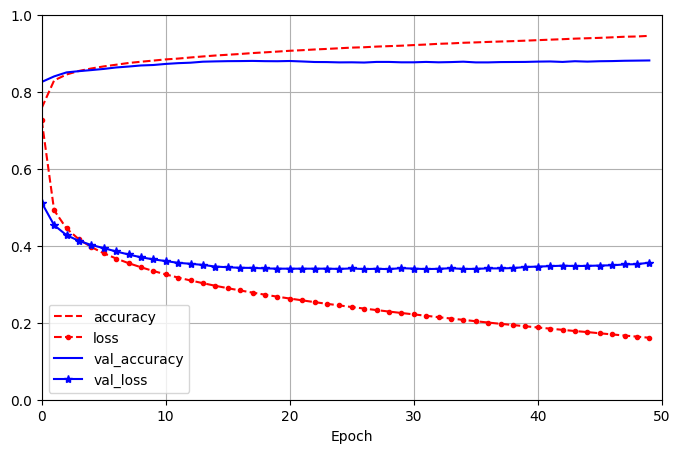

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,50], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3697


[0.367306113243103, 0.8787999749183655]

In [57]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:
%reload_ext tensorboard
